In [8]:
import pandas as pd

In [9]:
df = pd.read_csv("D:/Projects/personalized-study-path/data/raw/students_data.csv")
df.head()

,Student_ID,Age,Gender,Education_Level,Course_Name,Time_Spent_on_Videos,Quiz_Attempts,Quiz_Scores,Forum_Participation,Assignment_Completion_Rate,Engagement_Level,Final_Exam_Score,Learning_Style,Feedback_Score,Dropout_Likelihood
0,S00001,15,Female,High School,Machine Learning,171,4,67,2,89,Medium,51,Visual,1,No
1,S00002,49,Male,Undergraduate,Python Basics,156,4,64,0,94,Medium,92,Reading/Writing,5,No
2,S00003,20,Female,Undergraduate,Python Basics,217,2,55,2,67,Medium,45,Reading/Writing,1,No
3,S00004,37,Female,Undergraduate,Data Science,489,1,65,43,60,High,59,Visual,4,No
4,S00005,34,Female,Postgraduate,Python Basics,496,3,59,34,88,Medium,93,Visual,3,No


## EDA

In [10]:
print(df.shape)
print(df.columns)

(10000, 15)
Index(['Student_ID', 'Age', 'Gender', 'Education_Level', 'Course_Name',
       'Time_Spent_on_Videos', 'Quiz_Attempts', 'Quiz_Scores',
       'Forum_Participation', 'Assignment_Completion_Rate', 'Engagement_Level',
       'Final_Exam_Score', 'Learning_Style', 'Feedback_Score',
       'Dropout_Likelihood'],
      dtype='object')


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Student_ID                  10000 non-null  object
 1   Age                         10000 non-null  int64 
 2   Gender                      10000 non-null  object
 3   Education_Level             10000 non-null  object
 4   Course_Name                 10000 non-null  object
 5   Time_Spent_on_Videos        10000 non-null  int64 
 6   Quiz_Attempts               10000 non-null  int64 
 7   Quiz_Scores                 10000 non-null  int64 
 8   Forum_Participation         10000 non-null  int64 
 9   Assignment_Completion_Rate  10000 non-null  int64 
 10  Engagement_Level            10000 non-null  object
 11  Final_Exam_Score            10000 non-null  int64 
 12  Learning_Style              10000 non-null  object
 13  Feedback_Score              10000 non-null  int

In [12]:
df.describe()

,Age,Time_Spent_on_Videos,Quiz_Attempts,Quiz_Scores,Forum_Participation,Assignment_Completion_Rate,Final_Exam_Score,Feedback_Score
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,32.137700,255.375400,2.500500,64.578600,24.616200,69.546800,64.697000,3.012600
std,10.062647,141.656392,1.122642,20.289125,14.330305,17.360782,20.096417,1.421423
min,15.000000,10.000000,1.000000,30.000000,0.000000,40.000000,30.000000,1.000000
25%,24.000000,131.000000,1.000000,47.000000,12.000000,54.000000,47.000000,2.000000
50%,32.000000,257.000000,3.000000,65.000000,25.000000,69.000000,65.000000,3.000000
75%,41.000000,378.000000,4.000000,82.000000,37.000000,85.000000,82.000000,4.000000
max,49.000000,499.000000,4.000000,99.000000,49.000000,99.000000,99.000000,5.000000


In [13]:
df.isnull().sum()

Student_ID                    0
Age                           0
Gender                        0
Education_Level               0
Course_Name                   0
Time_Spent_on_Videos          0
Quiz_Attempts                 0
Quiz_Scores                   0
Forum_Participation           0
Assignment_Completion_Rate    0
Engagement_Level              0
Final_Exam_Score              0
Learning_Style                0
Feedback_Score                0
Dropout_Likelihood            0
dtype: int64

### Visual EDA Before Preprocessing

#### 1. Target Variable Distribution

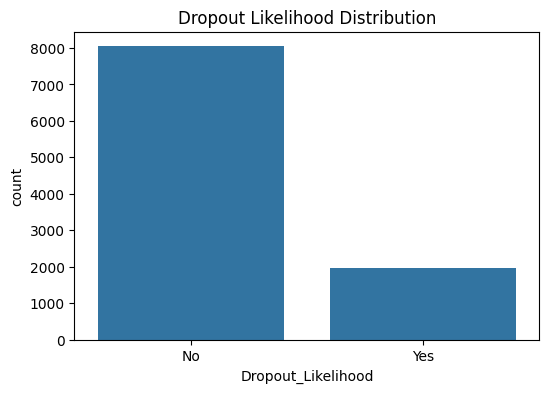

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Dropout_Likelihood')
plt.title("Dropout Likelihood Distribution")
plt.show()


#### 2. Numeric Column Distributions

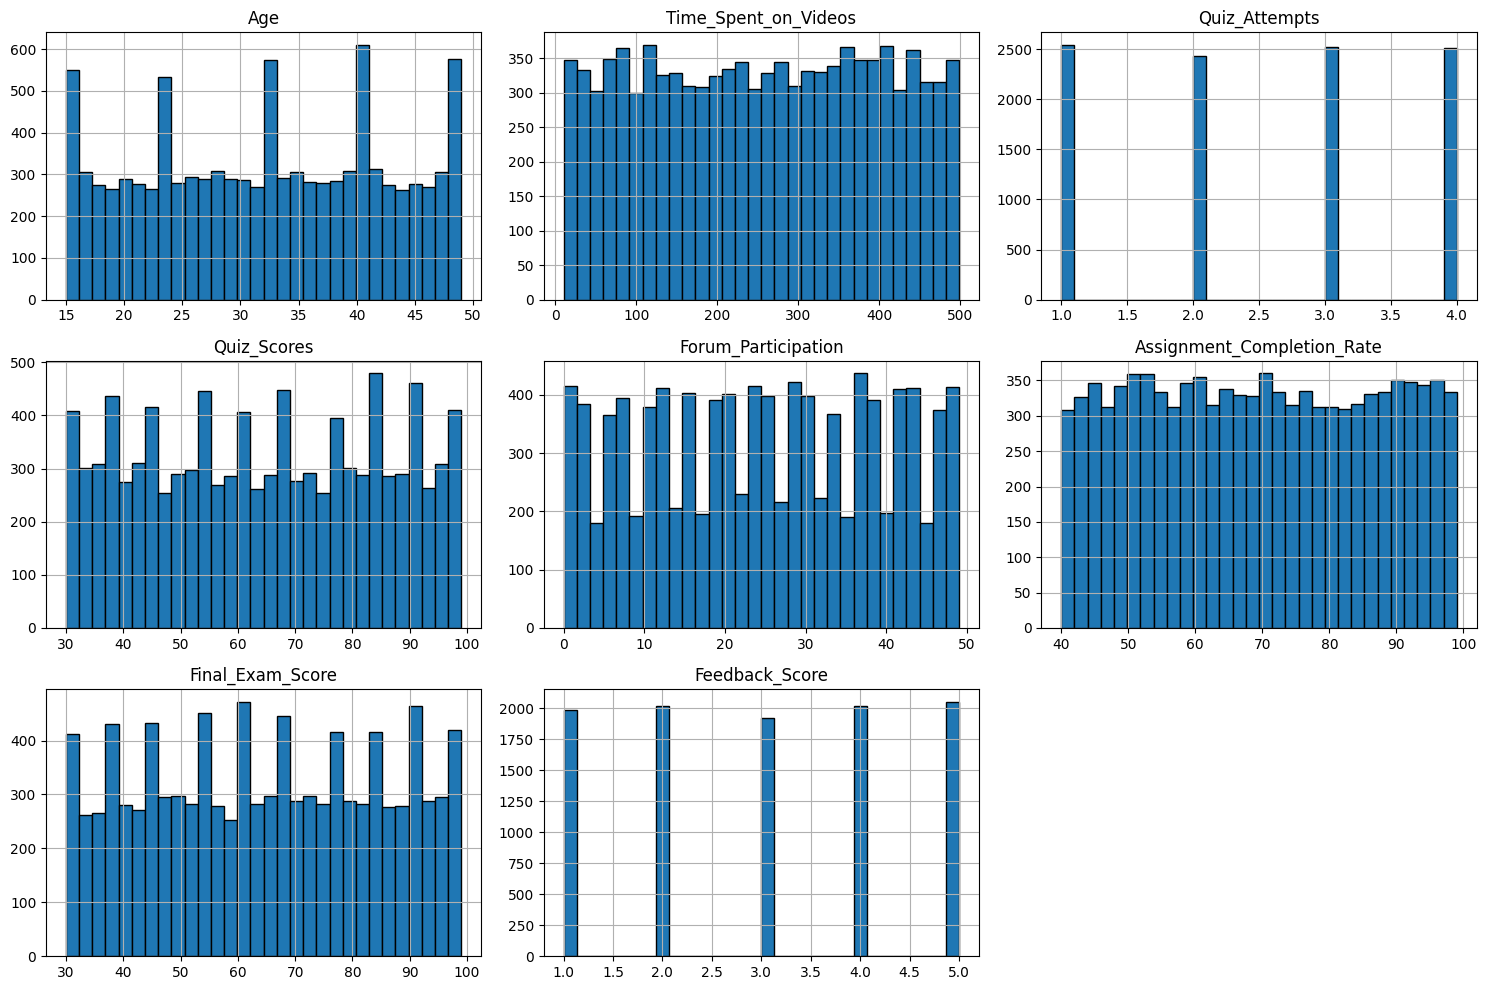

In [15]:
df.hist(figsize=(15,10), bins= 30, edgecolor='black')
plt.tight_layout()
plt.show()

#### 3. Boxplots to see Outliers

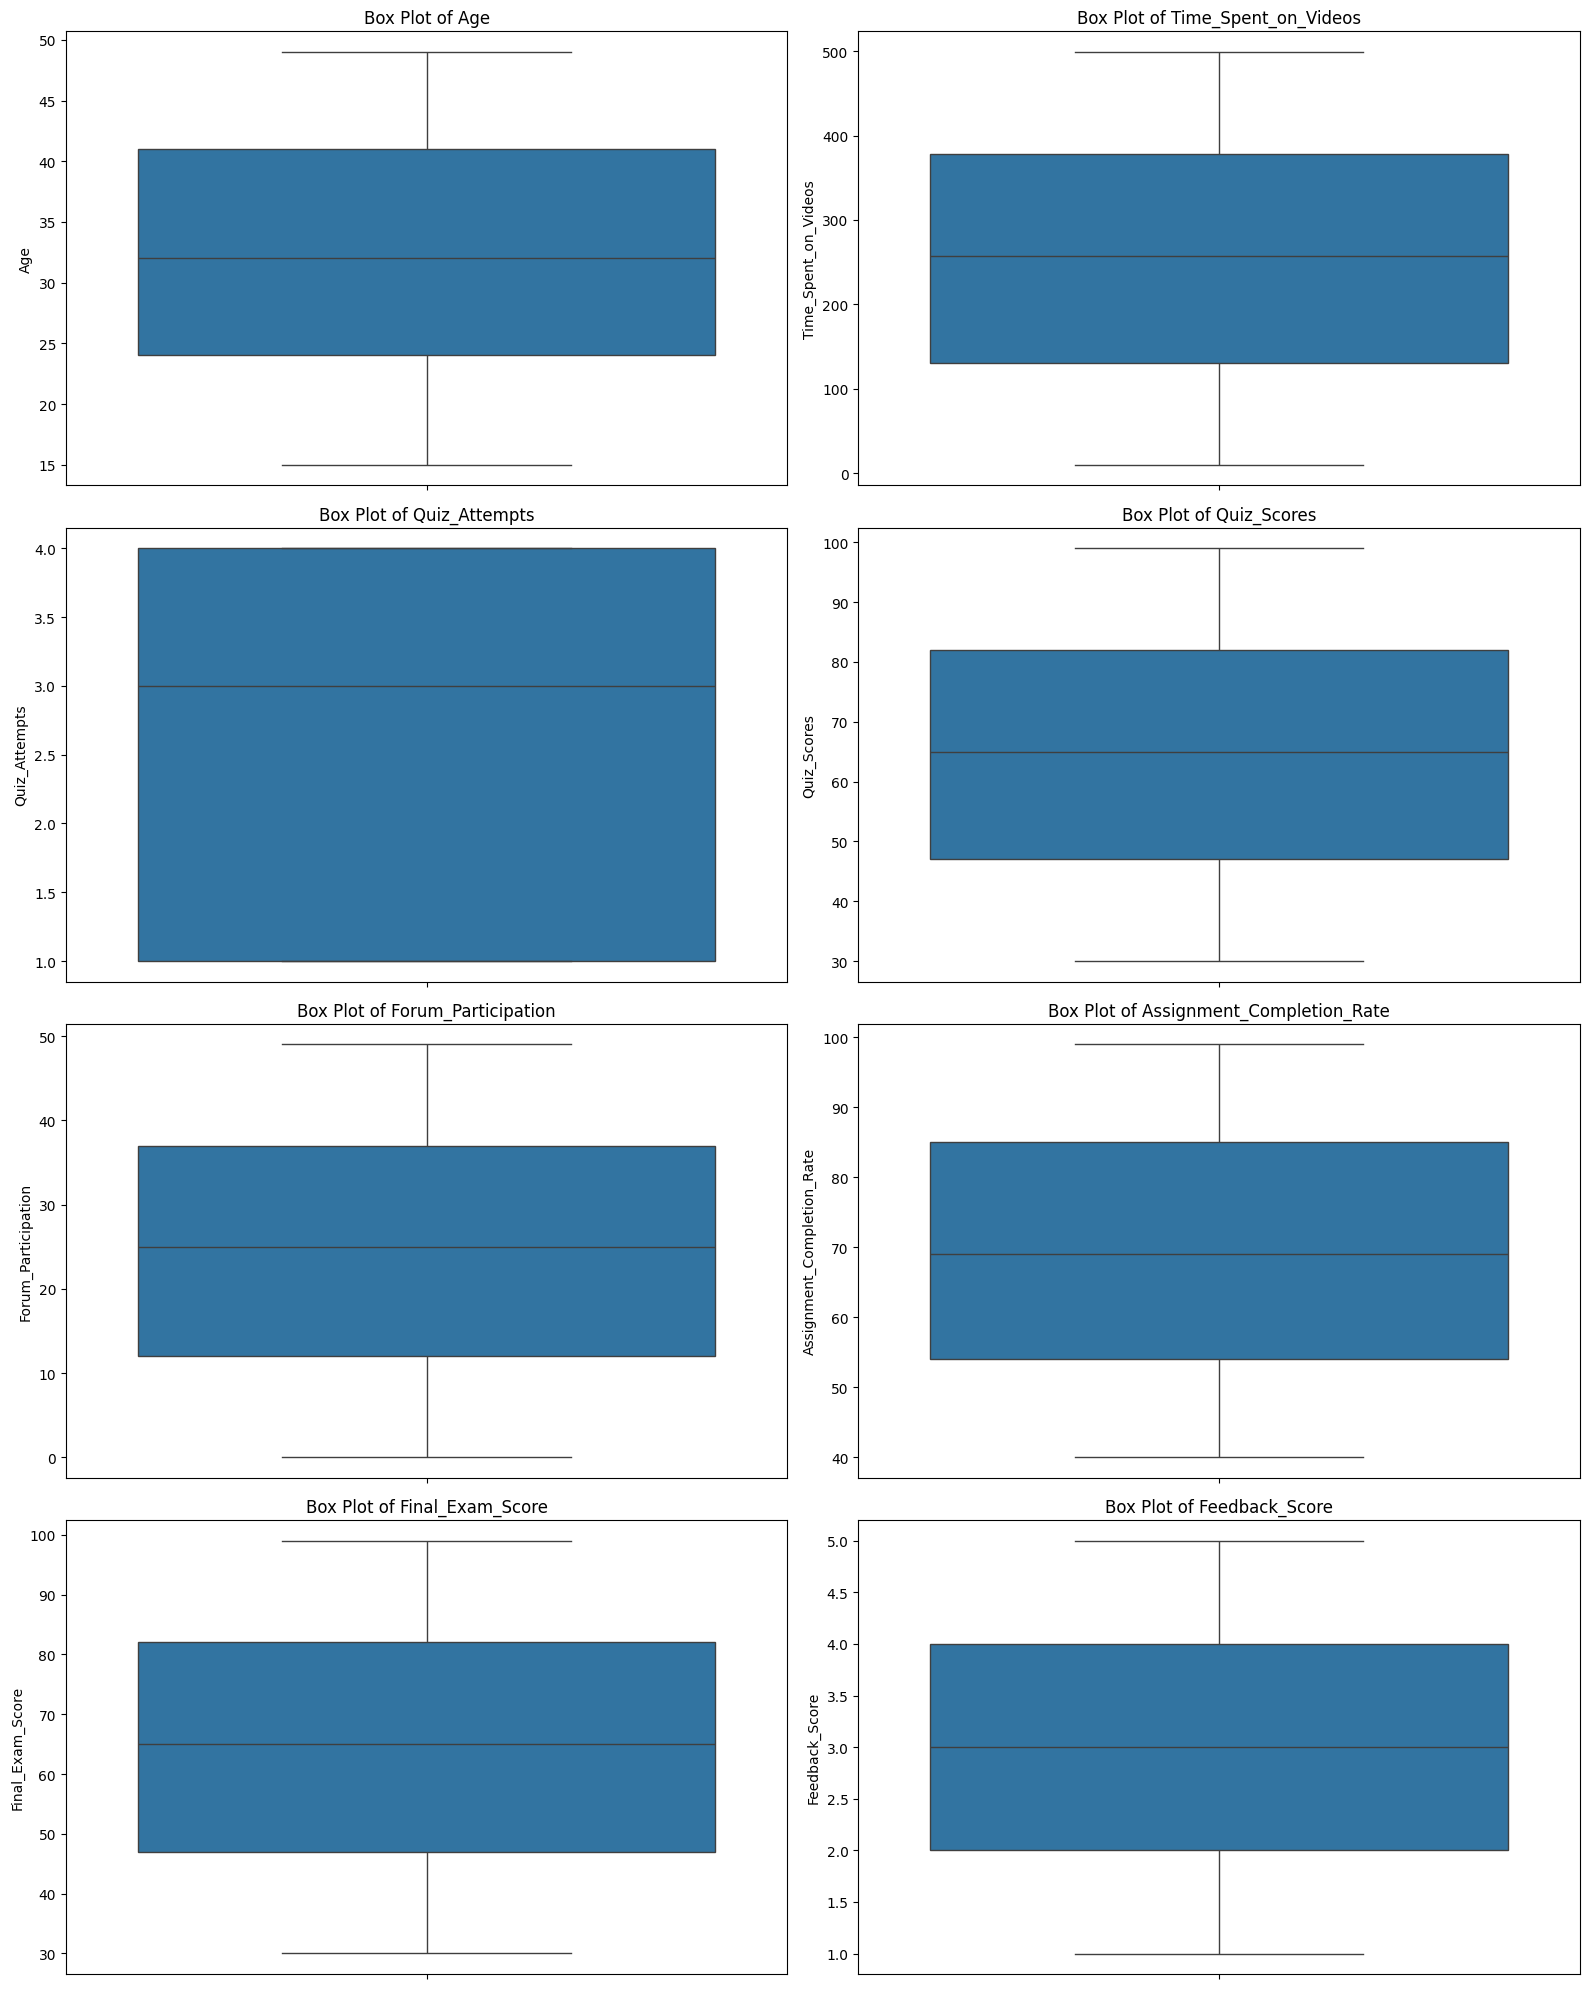

In [16]:
numeric_cols = df.select_dtypes(include='number').columns

plt.figure(figsize=(16, 20))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.tight_layout()


#### 4. Correlation Heatmap

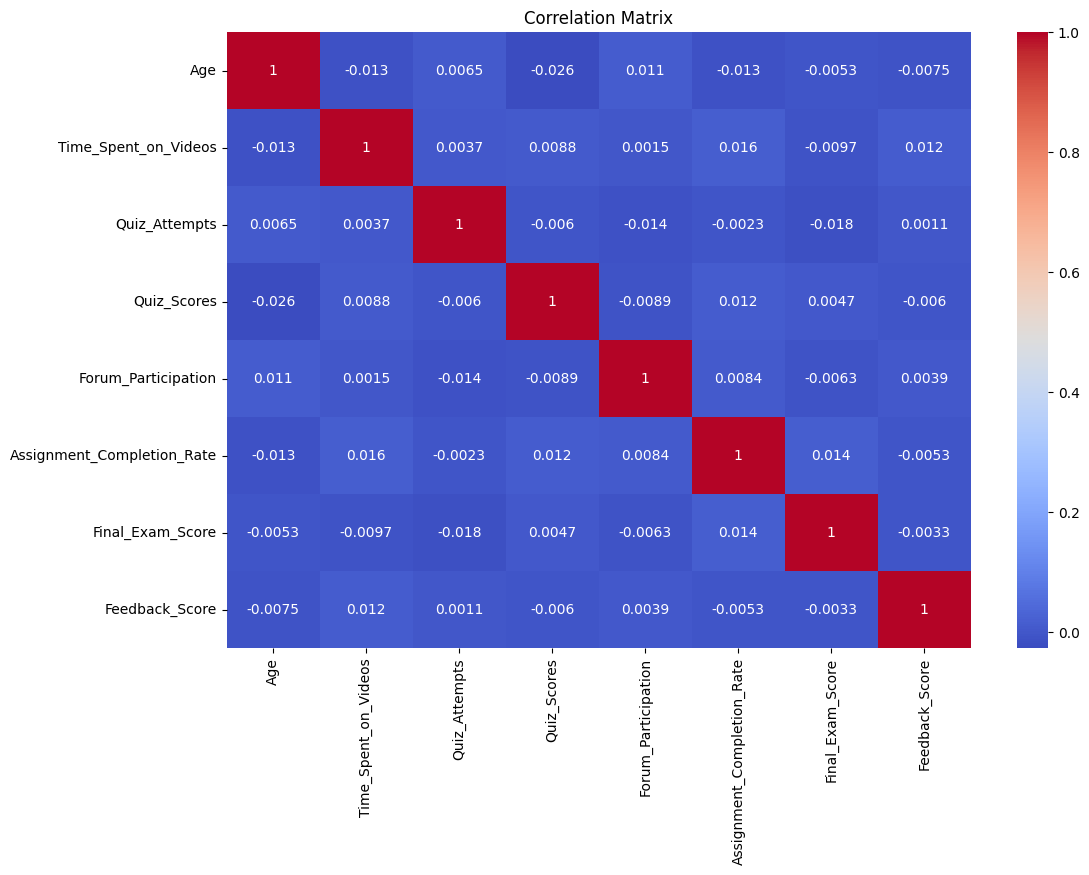

In [17]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include='number')


plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


## Preprocessing

In [18]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [19]:
df = df.drop(columns=['Student_ID'])

In [20]:
# Separate features and target (optional for clustering)
X = df.drop(columns=['Dropout_Likelihood'])  # keep this column aside for later
y = df['Dropout_Likelihood']

In [21]:
# Define feature types
categorical_nominal = ['Gender', 'Course_Name', 'Learning_Style']
categorical_ordinal = ['Education_Level']
numerical_features = [col for col in X.select_dtypes(include=['int64', 'float64']).columns
                      if col not in categorical_ordinal]

In [22]:
# Optional: Define order for ordinal encoding
education_order = ['High School', 'Bachelor', 'Master', 'PhD']
education_mapping = {level: idx for idx, level in enumerate(education_order)}
X['Education_Level'] = X['Education_Level'].map(education_mapping)

In [23]:
# Define transformers
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])


numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [24]:
# Combine transformations
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_nominal)
])

In [25]:
# Fit and transform
X_preprocessed = preprocessor.fit_transform(X)

In [26]:
# Convert back to DataFrame (optional but helpful for inspection)
# Get new column names after one-hot encoding
ohe_cols = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_nominal)
final_columns = numerical_features + list(ohe_cols)

In [27]:
preprocessed_df = pd.DataFrame(X_preprocessed, columns=final_columns)

In [28]:
preprocessed_df

,Age,Time_Spent_on_Videos,Quiz_Attempts,Quiz_Scores,Forum_Participation,Assignment_Completion_Rate,Final_Exam_Score,Feedback_Score,Gender_Female,Gender_Male,Gender_Other,Course_Name_Cybersecurity,Course_Name_Data Science,Course_Name_Machine Learning,Course_Name_Python Basics,Course_Name_Web Development,Learning_Style_Auditory,Learning_Style_Kinesthetic,Learning_Style_Reading/Writing,Learning_Style_Visual
0,-1.703186,-0.595664,1.335755,0.119351,-1.578287,1.120582,-0.681598,-1.415976,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.675816,-0.701559,1.335755,-0.028519,-1.717858,1.408601,1.358668,1.398246,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-1.206274,-0.270918,-0.445845,-0.472129,-1.578287,-0.146706,-0.980174,-1.415976,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.483227,1.649317,-1.336646,0.020771,1.282926,-0.549934,-0.283498,0.694691,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.185080,1.698735,0.444955,-0.274969,0.654855,1.062978,1.408431,-0.008865,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.609979,-0.659201,-0.445845,1.105150,0.166355,0.198918,0.164366,-0.712420,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9996,0.483227,1.352810,-0.445845,-1.260768,-1.020001,-0.089102,-0.930411,-1.415976,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9997,0.781374,-1.061603,1.335755,-0.718579,-0.112788,-1.644409,-0.034685,-1.415976,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
9998,1.178904,-0.073247,-0.445845,0.957280,1.003783,0.890166,-1.328512,-0.712420,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [29]:
preprocessed_df.to_csv("preprocessed_students.csv", index=False)

In [30]:
preprocessed_df.dtypes

Age                               float64
Time_Spent_on_Videos              float64
Quiz_Attempts                     float64
Quiz_Scores                       float64
Forum_Participation               float64
Assignment_Completion_Rate        float64
Final_Exam_Score                  float64
Feedback_Score                    float64
Gender_Female                     float64
Gender_Male                       float64
Gender_Other                      float64
Course_Name_Cybersecurity         float64
Course_Name_Data Science          float64
Course_Name_Machine Learning      float64
Course_Name_Python Basics         float64
Course_Name_Web Development       float64
Learning_Style_Auditory           float64
Learning_Style_Kinesthetic        float64
Learning_Style_Reading/Writing    float64
Learning_Style_Visual             float64
dtype: object